# Assignment 2
| Student Name           | Student Id | Course                                        |
|------------------------|------------|-----------------------------------------------|
| Christo Pananjickal Baby | 8989796    | CSCN8020 - Reinforcement Learning Programming |

I have alreeady emailed the report(prerequisite activity) based on Week 5 in-class activity at the same day.

### Step 1: Environment Setup and Exploration

In this section, we will:
- Import the required Python libraries.
- Load the `Taxi-v3` environment from **Gymnasium**.
- Explore the environment’s action space, observation space, and rewards using the helper utilities provided in `assignment2_utils.py`.

In [1]:
# Import required libraries
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
from assignment2_utils import describe_env
import pandas as pd
import tabulate as tb
import time

In [2]:
# Configure plot style for better visuals
plt.style.use('seaborn-v0_8-whitegrid')

The logs printed below this code block are being printed from the helper function `describe_env`

In [3]:
# Load the Taxi-v3 environment
env = gym.make("Taxi-v3")

# Describe environment details
num_states, num_actions = describe_env(env)

Observation space:  Discrete(500)
Observation space size:  500
Reward Range:  (-inf, inf)
Number of actions:  6
Action description:  {0: 'Move south (down)', 1: 'Move north (up)', 2: 'Move east (right)', 3: 'Move west (left)', 4: 'Pickup passenger', 5: 'Drop off passenger'}


### Part 2: Implementing the Q-Learning Algorithm

Q-Learning is a model-free RL algorithm that helps an agent learn the optimal action-selection policy through trial and error. It works by updating a Q-table, which stores the expected future rewards for each state-action pair, using the Bellman equation. Over time, the agent learns to choose actions that maximize its total cumulative reward.

So to implement Q-Learning, we will:
- Initialize the **Q-table** that stores action values for each state-action pair.
- Define the **Q-Learning training loop**, which iteratively updates the Q-values based on agent experience.
- Implement the **ε-greedy policy** for exploration and exploitation.
- Use the given hyperparameters:
  - Learning Rate (α) = 0.1
  - Discount Factor (γ) = 0.9
  - Exploration Rate (ε) = 0.1

The goal is to train the agent so that it learns the optimal strategy to pick up and drop off passengers efficiently. I have added the training logs for few episodes to understand what is really going on.


`train_q_learning` is a reusable function which will do the traing based on the given factors. This function will also plot the rewards graph and print the Q-table.

In [4]:
def train_q_learning(alpha=0.1, gamma=0.9, epsilon=1.0, epsilon_decay=0.995, min_epsilon=0.1,
                     episodes=5000, max_steps=100, log_episodes=3, enable_logs=True):
   
   # Make the gym Taxhi-V3 environment
    env = gym.make("Taxi-v3")
    num_states, num_actions = describe_env(env, enable_logs=enable_logs)
    Q = np.zeros((num_states, num_actions))
    
    rewards = []
    steps_per_episode = []

    # Start timer
    start_time = time.time()

    for episode in range(episodes):
        state, _ = env.reset()
        total_rewards = 0
        done = False
        steps = 0

        while not done and steps < max_steps:
            # Exploration vs. Exploitation
            if np.random.uniform(0, 1) < epsilon:
                action = env.action_space.sample()  # Explore
            else:
                action = np.argmax(Q[state, :])      # Exploit

            next_state, reward, done, truncated, info = env.step(action)

            # Update Q-value using the Q-learning update rule
            old_value = Q[state, action]
            next_max = np.max(Q[next_state, :])
            Q[state, action] = (1 - alpha) * old_value + alpha * (reward + gamma * next_max)

            total_rewards += reward
            state = next_state
            steps += 1

            if episode < log_episodes and enable_logs:
                print(f"Ep {episode+1} | Step {steps} | State {state} | Action {action} | "
                      f"Reward {reward} | Updated Q {Q[state, action]:.2f}")

        rewards.append(total_rewards)
        steps_per_episode.append(steps)
        epsilon = max(min_epsilon, epsilon * epsilon_decay)

    # Stop timer
    end_time = time.time()
    training_time = end_time - start_time

    # Build summary DataFrame
    df = pd.DataFrame({
        "Training Time (s)": [round(training_time, 2)],
        "Average Return per Episode": [np.mean(rewards)],
        "Total Steps per Episode": [np.mean(steps_per_episode)],
        "Total Episodes": [episodes],
        "Learning Rate": [alpha],
        "Exploration Factor": [min_epsilon],
        "Discount Factor": [gamma]
    })

    if enable_logs:
        print("\n Q-Table (first 5 rows):")
        print(tb.tabulate(pd.DataFrame(Q).head(), headers='keys', tablefmt='fancy_grid'))


    plt.figure(figsize=(10,5))
    plt.plot(rewards, label='Reward per Episode', color='royalblue')
    plt.title(f'Q-Learning Training Progress (Taxi-v3)\n'
                  f'α={alpha}, γ={gamma}, ε={min_epsilon}, Episodes={episodes}, '
                  f'Total Steps per Episode={np.mean(steps_per_episode)}s, '
                  f'Training Time={training_time:.2f}s, '
                  f'Average Return per Episode={np.mean(rewards)}')
    plt.xlabel('Episodes')
    plt.ylabel('Total Reward')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()


    return Q, df


Observation space:  Discrete(500)
Observation space size:  500
Reward Range:  (-inf, inf)
Number of actions:  6
Action description:  {0: 'Move south (down)', 1: 'Move north (up)', 2: 'Move east (right)', 3: 'Move west (left)', 4: 'Pickup passenger', 5: 'Drop off passenger'}
Ep 1 | Step 1 | State 354 | Action 5 | Reward -10 | Updated Q -1.00
Ep 1 | Step 2 | State 334 | Action 3 | Reward -1 | Updated Q 0.00
Ep 1 | Step 3 | State 354 | Action 2 | Reward -1 | Updated Q 0.00
Ep 1 | Step 4 | State 354 | Action 4 | Reward -10 | Updated Q -1.00
Ep 1 | Step 5 | State 354 | Action 2 | Reward -1 | Updated Q -0.10
Ep 1 | Step 6 | State 254 | Action 1 | Reward -1 | Updated Q 0.00
Ep 1 | Step 7 | State 154 | Action 1 | Reward -1 | Updated Q 0.00
Ep 1 | Step 8 | State 154 | Action 4 | Reward -10 | Updated Q -1.00
Ep 1 | Step 9 | State 254 | Action 0 | Reward -1 | Updated Q 0.00
Ep 1 | Step 10 | State 154 | Action 1 | Reward -1 | Updated Q 0.00
Ep 1 | Step 11 | State 154 | Action 4 | Reward -10 | Upda

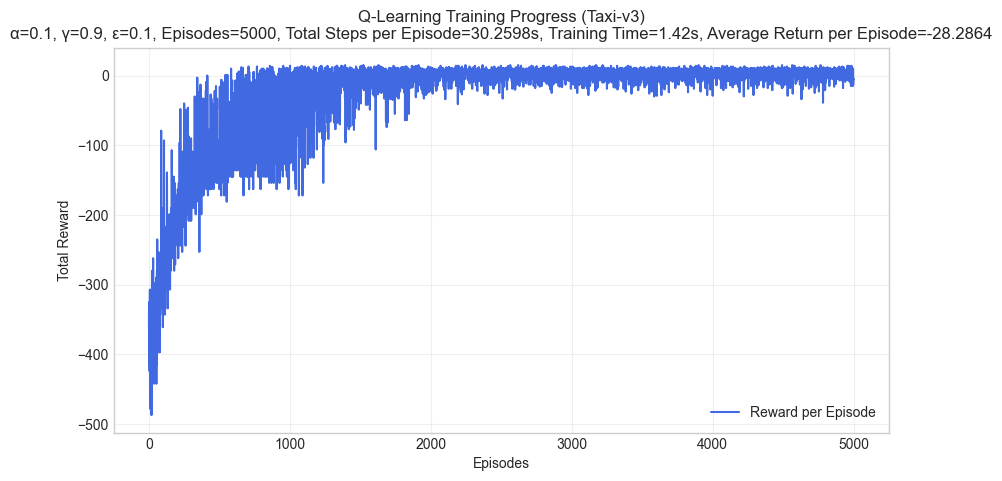

,Training Time (s),Average Return per Episode,Total Steps per Episode,Total Episodes,Learning Rate,Exploration Factor,Discount Factor
0,1.42,-28.2864,30.2598,5000,0.1,0.1,0.9


In [5]:
# Train the agent using the defined Q-learning function
Q_table, metrics_df0 = train_q_learning(
    alpha=0.1,
    gamma=0.9,
    epsilon=1.0,
    epsilon_decay=0.995,
    min_epsilon=0.1,
    episodes=5000,
    max_steps=100,
    log_episodes=3
)


display(metrics_df0)

### Part 3: Trying Q-Learning with different learning rate and exploration factor
Now we will deliberatly change the learning rate and exploration factor to the below given values and rerun the training.
Learning Rate α= [0.01,0.001,0.2]
Exploration Factor γ = [0.2,0.3]

I have tabulated the Total episodes, total steps taken per episode, average return per episode etc are the end for easy comparison and plotted graphs for each training.  

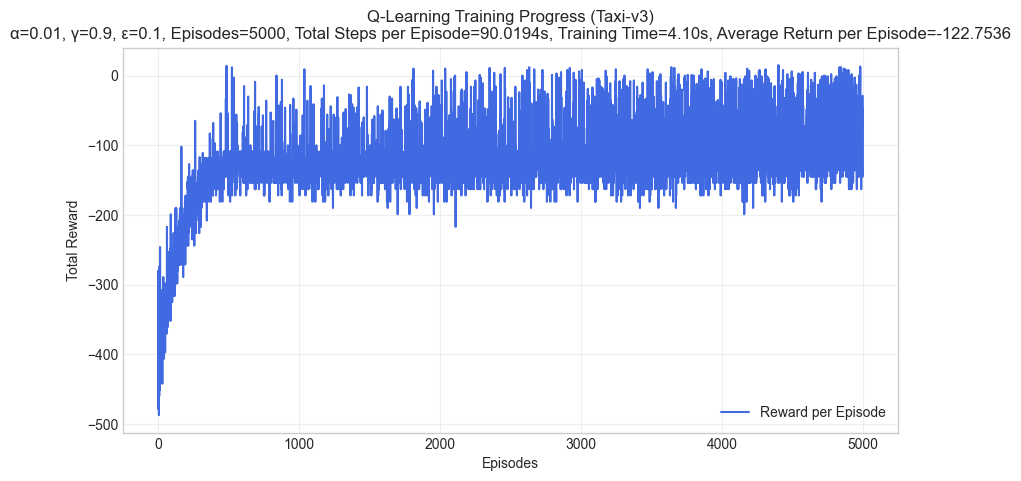

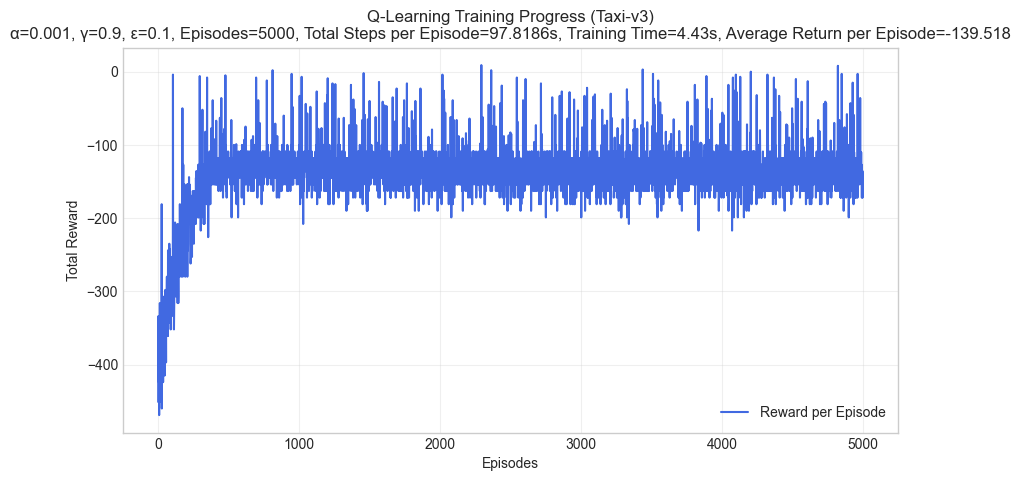

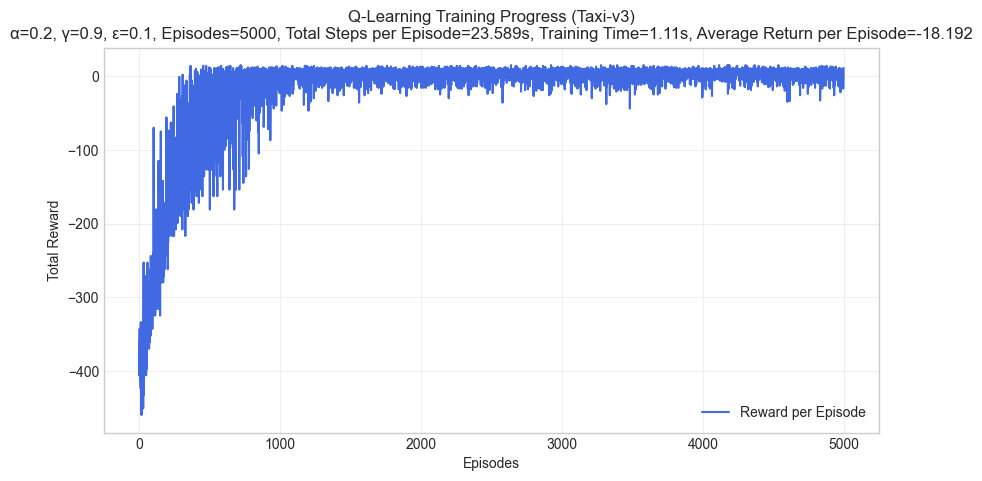

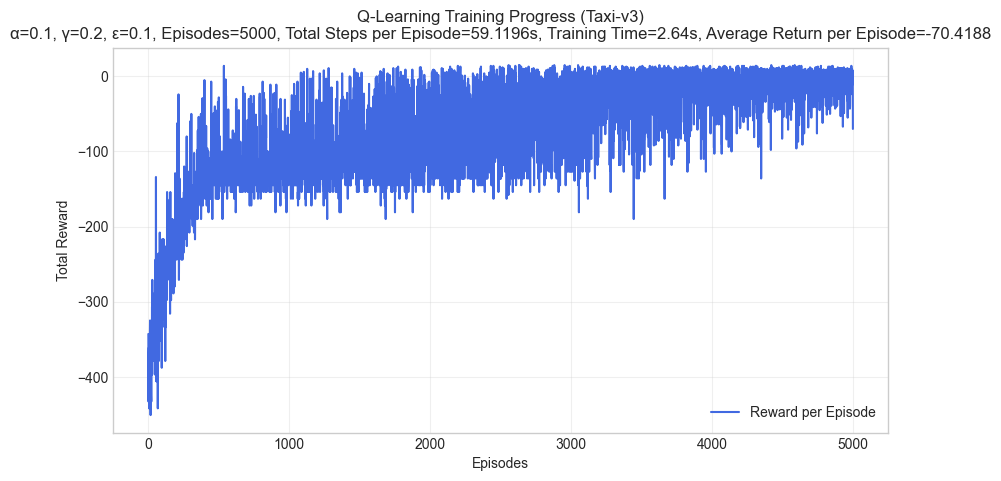

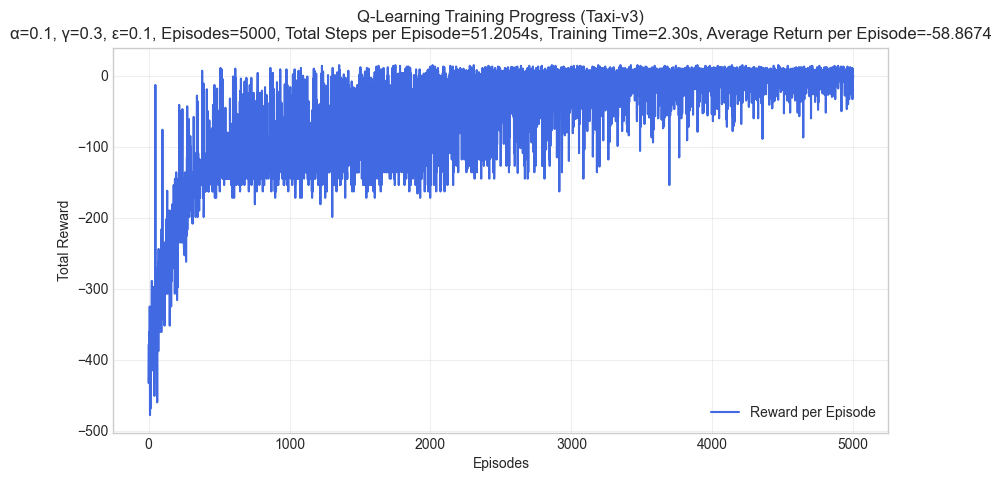


Q-Learning Parameter Comparison Results:

╒════╤═════════════════════╤══════════════════════════════╤═══════════════════════════╤══════════════════╤═════════════════╤══════════════════════╤═══════════════════╕
│    │   Training Time (s) │   Average Return per Episode │   Total Steps per Episode │   Total Episodes │   Learning Rate │   Exploration Factor │   Discount Factor │
╞════╪═════════════════════╪══════════════════════════════╪═══════════════════════════╪══════════════════╪═════════════════╪══════════════════════╪═══════════════════╡
│  0 │                1.42 │                     -28.2864 │                   30.2598 │             5000 │           0.1   │                  0.1 │               0.9 │
├────┼─────────────────────┼──────────────────────────────┼───────────────────────────┼──────────────────┼─────────────────┼──────────────────────┼───────────────────┤
│  1 │                4.1  │                    -122.754  │                   90.0194 │             5000 │           

In [6]:
results = [metrics_df0] 

# Define parameter sets
learning_rates = [0.01, 0.001, 0.2]
discount_factors = [0.2, 0.3]

# Train with different learning rates
for alpha in learning_rates:
    Q, df = train_q_learning(alpha=alpha, gamma=0.9, episodes=5000, log_episodes=0, enable_logs =False)
    results.append(df)

# Train with different discount factors
for gamma in discount_factors:
    Q, df = train_q_learning(alpha=0.1, gamma=gamma, episodes=5000, log_episodes=0,enable_logs=False)
    results.append(df)

# Combine all results
all_results = pd.concat(results, ignore_index=True)

# Display using tabulate for neat table
print("\nQ-Learning Parameter Comparison Results:\n")
print(tb.tabulate(all_results, headers='keys', tablefmt='fancy_grid'))

The report explaning these observations and comments are submitted in the PDF file.

### Part 4: Best Combination of Learning Rate and Exploration Factor
After testing multiple hyperparameter combinations, α = 0.1 and γ = 0.9 delivered the best balance of speed, stability, and performance. This configuration achieved quick convergence with consistent rewards and minimal fluctuations, showing stable and efficient learning overall. In contrast, higher learning rates caused faster but noisier training with unstable value updates.

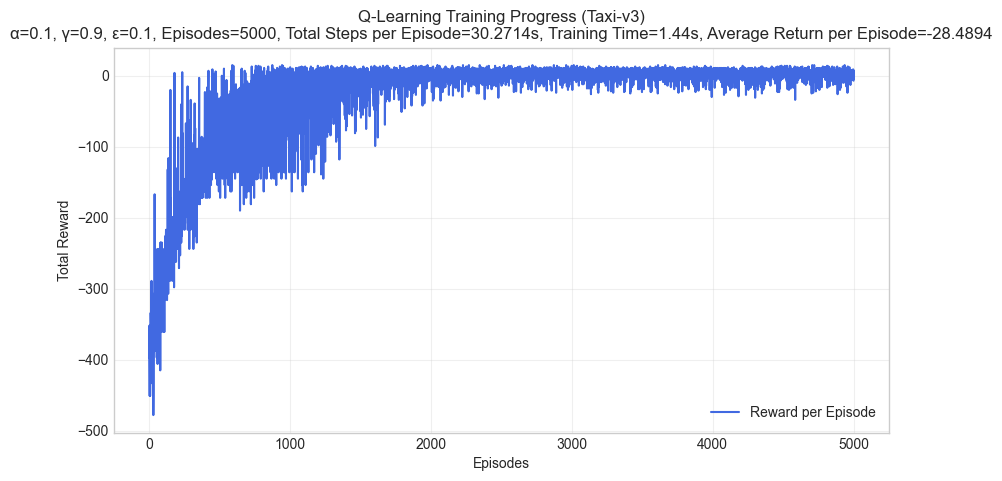

,Training Time (s),Average Return per Episode,Total Steps per Episode,Total Episodes,Learning Rate,Exploration Factor,Discount Factor
0,1.44,-28.4894,30.2714,5000,0.1,0.1,0.9


In [11]:
q_star, metrics_star =train_q_learning(
    alpha=0.1,
    gamma=0.9,
    epsilon=1.0,
    epsilon_decay=0.995,
    min_epsilon=0.1,
    episodes=5000,
    max_steps=100,
    log_episodes=3,
    enable_logs=False,
)

display(metrics_star)